# <h1 align="center">🤗<font color="yellow">Oito exemplos é tudo que você precisa</font>🤗</h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Este script foi baseado no maravilhoso link do [MantisNLP](https://medium.com/mantisnlp).

# Contextualizando

Não é segredo que o poder dos modelos de aprendizado de máquina vem dos dados nos quais eles são treinados. Não deveria ser nenhuma surpresa, então, que a pergunta mais comum que recebemos no início de qualquer projeto que realizamos aqui no Mantis é `“Quantos dados são necessários?”`. Como na maioria das vezes os dados precisariam ser preparados especificamente para a tarefa em questão, há uma compensação entre o `custo da coleta de dados` e o `desempenho obtido`.


A boa notícia é que estamos progredindo na quantidade de dados necessários para atingir um determinado nível de desempenho. Até recentemente, uma boa regra prática era ter pelo menos `100 exemplos` por classe em um `problema de classificação`. Um problema de classificação seria, <font color="red">por exemplo:</font> identificar e-mails `spam` versus `não spam`. Então, chegaram os modelos de `Aprendizagem por Transferência` e pré-treinados, o que eu diria que reduziu pela metade esse requisito para cerca de `50 exemplos` por classe. A capacidade desses modelos de aprender com mais eficiência veio do pré-treinamento deles em grandes quantidades de dados de `texto` ou `imagem`, o que lhes permitiu aprender informações úteis que podem `“transfer”` para a tarefa em questão.


`Ao contrário das abordagens mais tradicionais`, esses modelos pré-treinados, em particular os `Transformers`, pareciam ser bem dimensionados com mais dados, por isso era natural perguntar se modelos maiores reduziriam ainda mais a quantidade de dados necessária. Como vimos com [GPT3](https://arxiv.org/abs/2005.14165) e [ChatGPT](https://openai.com/blog/chatgpt) mais recentemente, a resposta parece ser sim. Esses modelos parecem ser capazes de realizar quase qualquer tarefa com `poucos` ou `nenhum` dado. Esses `Modelos de Linguagem Grande` (LLM) vieram com duas advertências principais:



* Eles eram extremamente grandes e, como resultado, caros para uso rotineiro em comparação com modelos pré-treinados menores

* Eles eram bastante sensíveis a `“prompting”`, que são as `“instruções”` que você deu a eles no início para executar uma tarefa. Escrevemos uma série inteira de [postagens no blog](https://medium.com/mantisnlp/prompt-engineering-part-i-how-to-interact-with-large-language-models-859a87f15214), se você estiver mais interessado neste tópico.




Embora o `Prompt` pareça estar desaparecendo como um problema, como vimos com o trabalho recente de [alinhamento](https://openai.com/blog/our-approach-to-alignment-research) que resultou no [InstructGPT](https://openai.com/blog/our-approach-to-alignment-research) e no [ChatGPT](https://openai.com/blog/chatgpt), o tamanho e o custo dos LLMs ainda são um problema. É aqui que entra o [SetFit](https://huggingface.co/blog/setfit). O `SetFit` é uma abordagem de modelagem recente que se `baseia em modelos pré-treinados` e uma técnica chamada [Aprendizado Contrastivo](https://blog.dsacademy.com.br/10-tendencias-em-ia-que-os-cientistas-de-dados-devem-ficar_atentos/). O importante é que ele permite que modelos pré-treinados menores tenham um bom desempenho após o treinamento com apenas `8 exemplos` por `classe` sem um `prompt` nem o tamanho dos modelos grandes. Vamos ver uma comparação de desempenho direto do artigo que introduziu a técnica.



![](https://miro.medium.com/v2/resize:fit:640/0*uuruPXBVGHO5hxiF)

O gráfico acima compara `SetFit` usando [Mpnet](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) com [Roberta](https://ai.facebook.com/blog/roberta-an-optimized-method-for-pretraining-self-supervised-nlp-systems/) large, uma escolha de `baseline` padrão para modelos pré-treinados. Como podemos ver, são necessários apenas `8 exemplos por classe` para atingir o mesmo desempenho que `RoBERTa` requer perto de `64`. Também vemos que o ponto de retornos decrescentes é de `8` exemplos por classe. Nesse ponto, obtemos muito menos de um ponto percentual toda vez que dobramos os dados. O desempenho do modelo é muito próximo de um modelo treinado com todos os exemplos nesse conjunto de dados indicados pela linha vermelha pontilhada. Vamos ver um gráfico semelhante que produzi em dois conjuntos de dados adicionais:

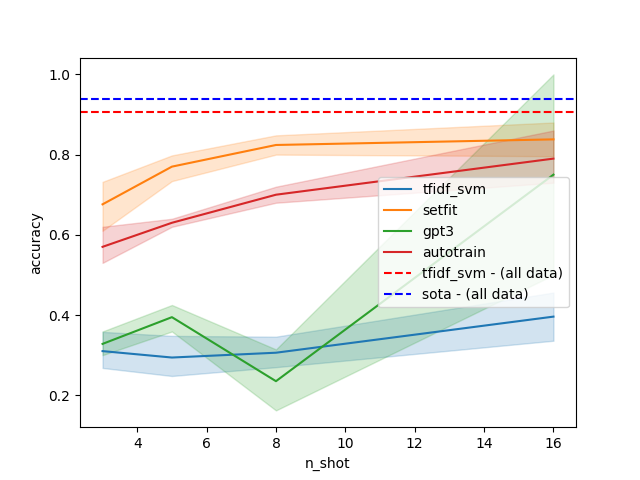

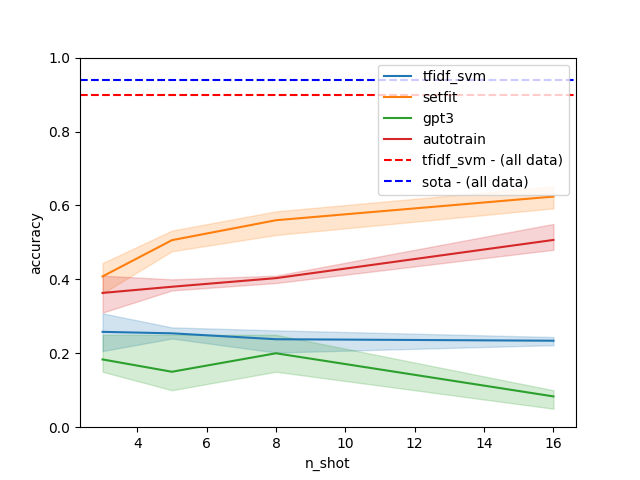

No gráfico acima, comparamos o `SetFit` com o [AutoTrain](https://huggingface.co/autotrain), que é uma solução `AutoML` da [huggingface](https://huggingface.co/) 🤗, bem como o `GPT3` e o `Tf Idf SVM`, um modelo mais tradicional. O gráfico da esquerda está nos conjuntos de dados [ag_news](https://huggingface.co/datasets/ag_news), enquanto o da direita está na emoção. O `SetFit` parece superar facilmente os outros modelos em relação à quantidade de dados necessária para um determinado desempenho e `8 exemplos` ainda parecem ser o ponto de retornos decrescentes. Ao mesmo tempo, o desempenho do `GPT3 é muito ruim, mas isso pode estar relacionado à escolha do prompt`.


Definitivamente, existem algumas advertências com o SetFit. Por um lado, como vemos no gráfico à direita, nem sempre tem um desempenho tão próximo do `estado da arte` com poucos exemplos. Isso pode estar relacionado com a escolha do modelo pré-treinado, mas mesmo assim vale lembrar que usar o SetFit com 8 exemplos por classe não é uma bala de prata. Ainda mais importante, <font color="red">o SetFit funciona apenas em tarefas de classificação de texto</font>, portanto, há vários aplicativos de processamento de linguagem natural para os quais não será relevante, como `Extrair Menções de documentos` ou `gerar texto`. Essas advertências à parte, a tendência de precisar de menos exemplos por classe para obter um modelo de trabalho é algo que veio para ficar.

# Como o SetFit faz isso? 🤔


Como dissemos anteriormente, o `SetFit` se baseia em `modelos pré-treinados` e uma técnica chamada `Aprendizagem Contrastiva`. Normalmente, o `aprendizado contrastivo` é usado para aprender `melhores features` ou `Embeddings de texto` ou `imagens`. Isso é muito relevante em aplicações como pesquisa por `similaridade`, onde você deseja produzir representações mais próximas no espaço para itens semelhantes. Para treinar um modelo usando `aprendizado contrastivo`, você precisa de <font color="yellow">pares de itens semelhantes, ou seja, positivos</font>, e <font color="pink">diferentes, ou seja, negativos</font>. O principal truque por trás do SetFit é que um conjunto de dados de **classificação de texto** pode ser transformado em pares de exemplos `positivos` e `negativos`, que neste caso seriam pares da mesma classe e pares que pertencem a uma classe diferente. Aqui está todo o pipeline SetFit:

![](https://miro.medium.com/v2/resize:fit:640/0*hDq-SC4xy_HrM4PJ)